FIRST UPLOAD DATASET ZIP FILE INTO RUNTIME FOLDER (/content)

In [ ]:
!unzip /content/shape-detector.v3i.yolov8.zip   #unzip the dataset zip file

import necessary libraries

In [ ]:
!pip install ultralytics==8.0.20
import ultralytics
from ultralytics import YOLO
import os

In [ ]:
model=YOLO("yolov8s.pt")      #using a custom yolo version 8 model
result=model.train(data="data.yaml",epochs=50,device=0)     #training the model with the data
                                                            #set device=0 to use gpu for much faster training

100%|██████████| 21.5M/21.5M [00:01<00:00, 14.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
# model=YOLO("/content/runs/detect/train/weights/last.pt")      #a resume cell incase the previous cell fails midway
# results = model.train(resume=True)

In [ ]:
model=YOLO("/content/runs/detect/train/weights/best.pt")      #validation porocess
result=model.val(data="data.yaml")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]
                   all         20        134      0.525      0.398       0.41      0.295
                 arrow         20          2          0          0          0          0
                circle         20         37      0.687      0.888      0.834      0.586
                elipse         20          1          1          0      0.995      0.697
              heptagon         20          2          0          0          0          0
               hexagon         20          3          1          0     0.0495     0.0307
              pentagon         20       

testing the model with sample images provided within the dataset

In [ ]:
model=YOLO("/content/runs/detect/train/weights/best.pt")
result=model.predict(source="/content/test/images",save=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
Results saved to runs/detect/predict


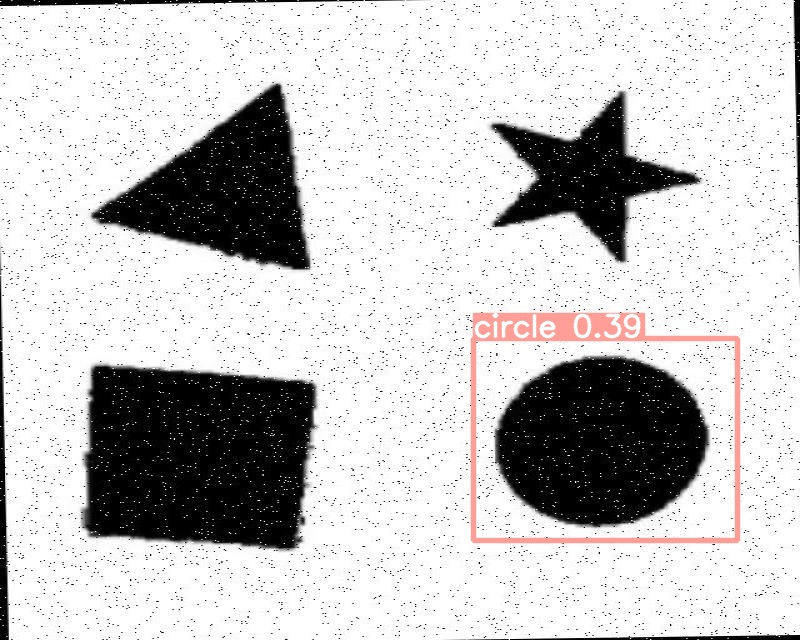

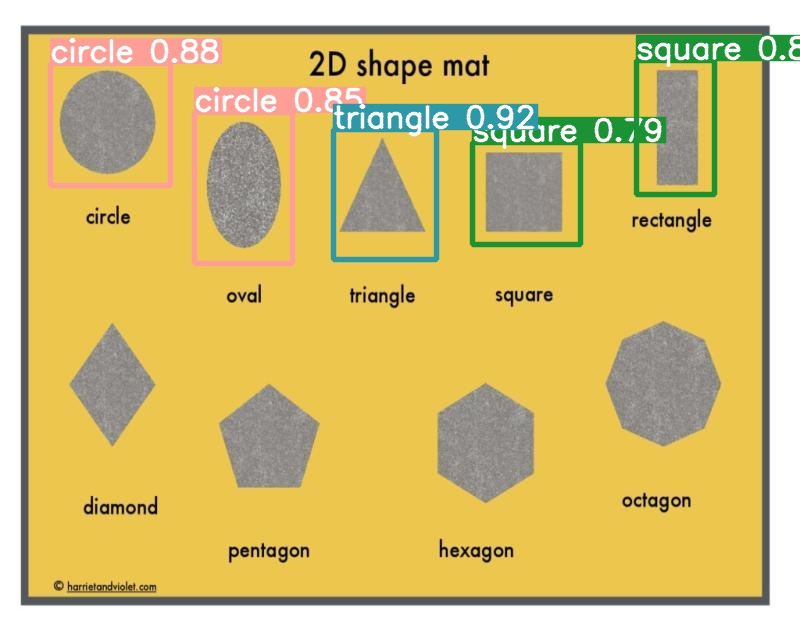

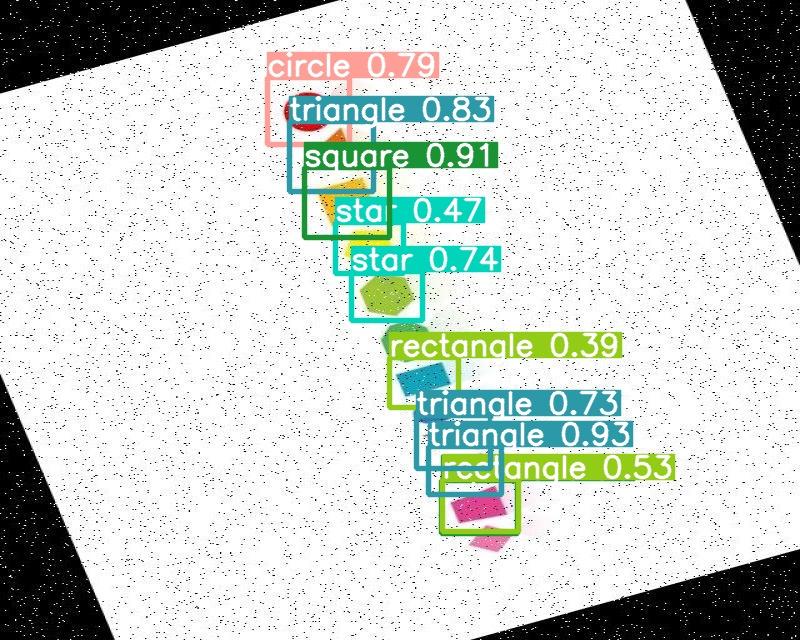

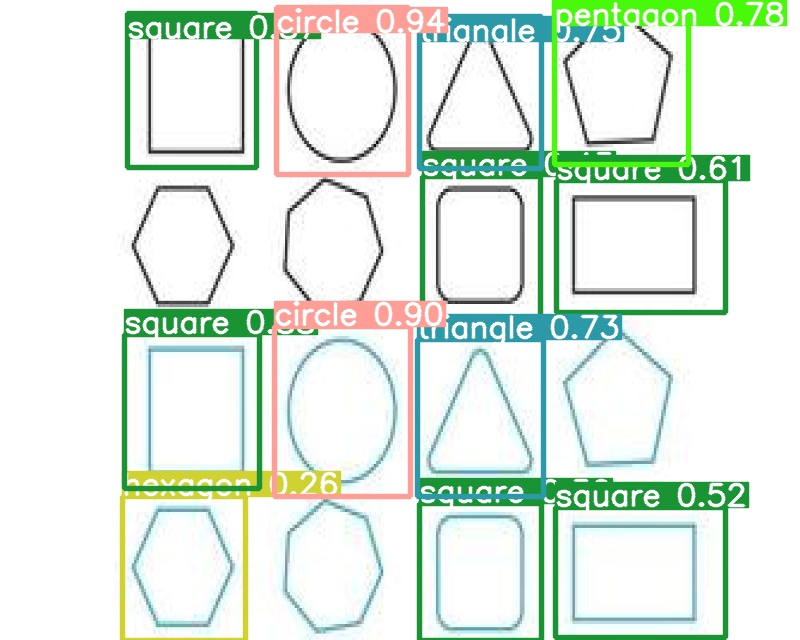

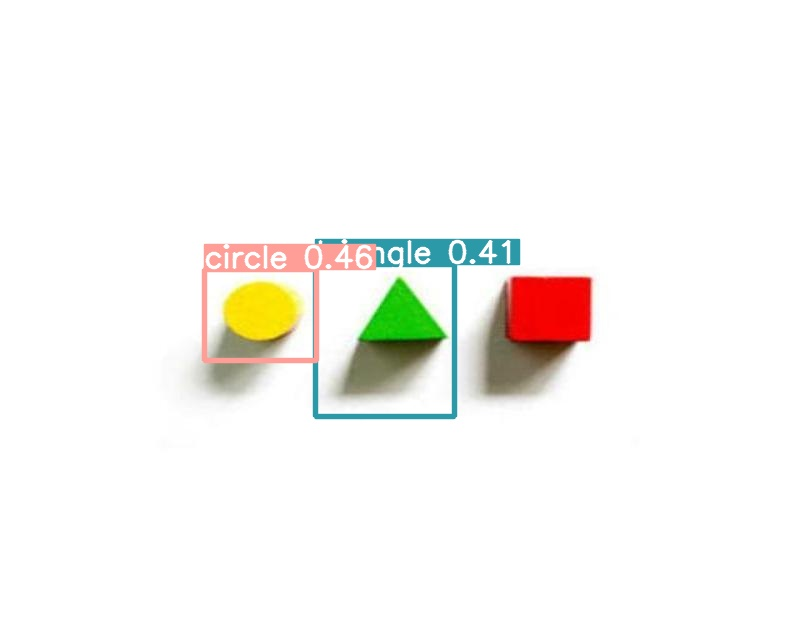

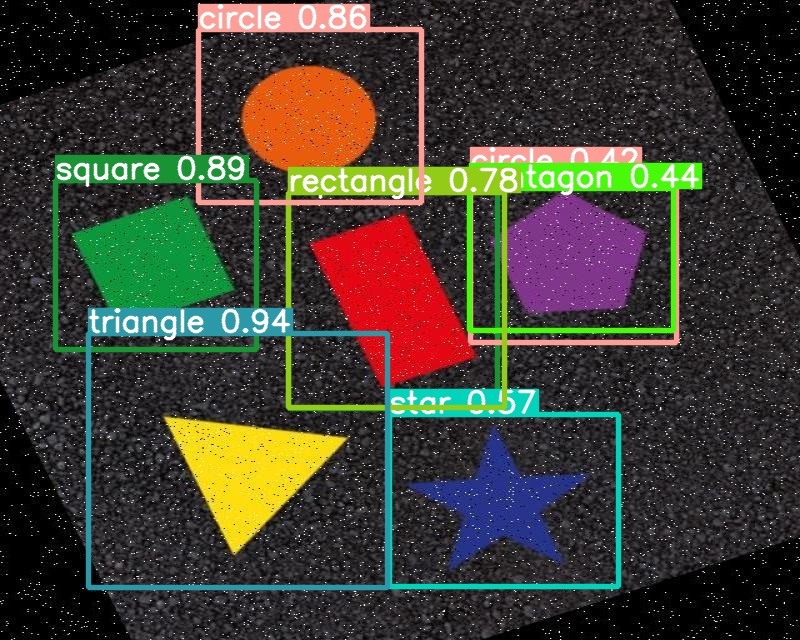

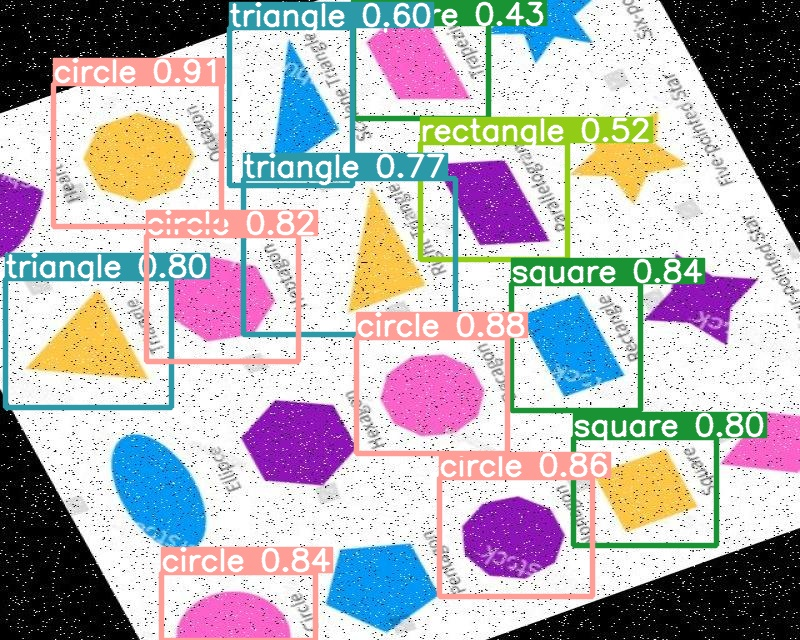

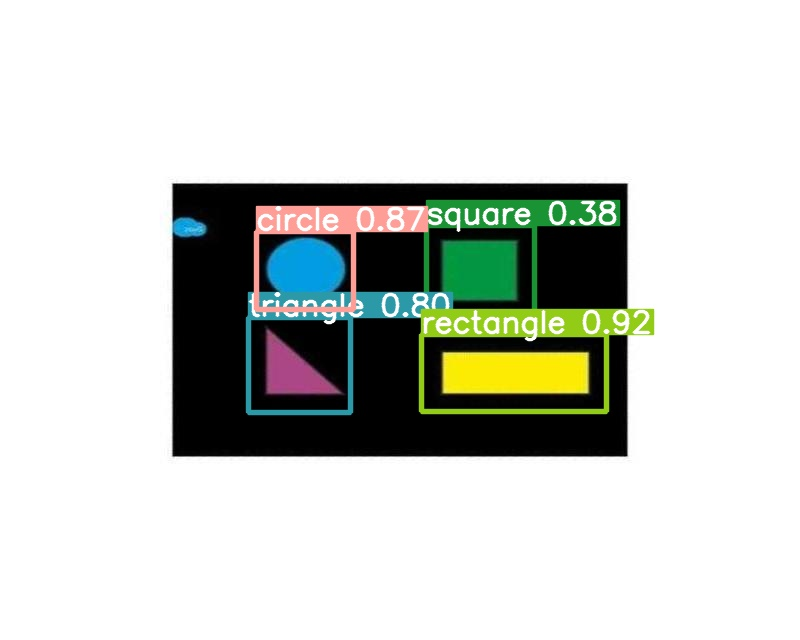

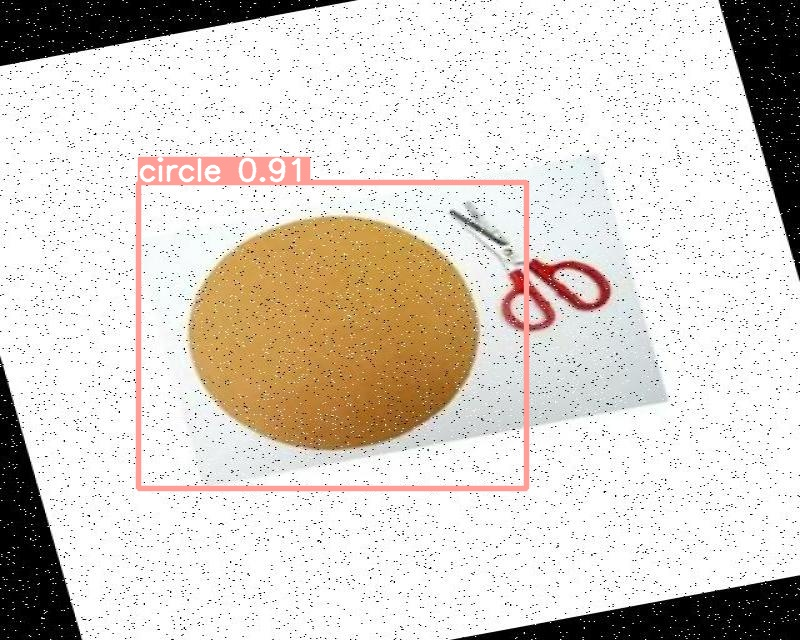

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=350))                    #previewing the results of the tests
      print("\n")

In [ ]:
Image(filename="/content/runs/detect/train/confusion_matrix.png", width=600)